In [8]:
import os
import sys
import nhl_data_loader
import importlib
importlib.reload(nhl_data_loader)

if os.path.join(os.path.dirname(os.getcwd()), "controller") not in sys.path:
    sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "controller"))
from nhl_data_downloader import NHLDataDownloader
from nhl_data_loader import NHLDataLoader

loader = NHLDataLoader()
downloader = NHLDataDownloader()

In [9]:
#range(2016, 2020) will download all seasons from 2016 to 2019
train_val_df = loader.load_old_csv_files([2016,2017,2018,2019])
print(train_val_df.head())

      game_id   game_date  home_team_id  period time_in_period  event_id  \
0  2016020001  2016-10-12             9       1          01:11         8   
1  2016020001  2016-10-12             9       1          02:53        11   
2  2016020001  2016-10-12             9       1          04:01        15   
3  2016020001  2016-10-12             9       1          04:46        16   
4  2016020001  2016-10-12             9       1          06:46        24   

     event_type  is_goal shot_type  x_coord  ...    team_name  team_type  \
0  shot-on-goal    False     wrist    -77.0  ...  Maple Leafs       away   
1  shot-on-goal    False     wrist     86.0  ...     Senators       home   
2  shot-on-goal    False     wrist     23.0  ...     Senators       home   
3  shot-on-goal    False      slap     33.0  ...     Senators       home   
4  shot-on-goal    False     wrist    -34.0  ...  Maple Leafs       away   

  distance_to_net angle_to_net empty_net  strength_status  \
0       13.000000   157.3

In [10]:

from ift6758.controller.logistic_model_analyzer import LogisticModelAnalyzer
analyzer = LogisticModelAnalyzer(train_val_df)
analyzer.run_analysis(features=["distance_to_net"])


Filtering data...
Preparing data...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 261689
 - Validation samples: 65423
Training model...
Evaluating model...
Validation Accuracy: 0.91

Plotting confusion matrix...


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: matthias-bigot (toma-allary-universit-de-montr-al). Use `wandb login --relogin` to force relogin


In [11]:
analyzer.run_analysis(features=["distance_to_net"],apply_smote=True)

Filtering data...
Preparing data...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 261689
 - Validation samples: 65423
Applying SMOTE to oversample minority class...
SMOTE applied. Training data balanced: 473900 samples.
Training model...
Evaluating model...
Validation Accuracy: 0.59

Plotting confusion matrix...


Training Distance Only model...
Preparing data with features: ['distance_to_net']...
Data prepared:
 - Training samples: 261689
 - Validation samples: 65423


Training Angle Only model...
Preparing data with features: ['angle_to_net']...
Data prepared:
 - Training samples: 261689
 - Validation samples: 65423


Training Distance and Angle model...
Preparing data with features: ['distance_to_net', 'angle_to_net']...
Data prepared:
 - Training samples: 261689
 - Validation samples: 65423


Generating random probabilities for Random Baseline...


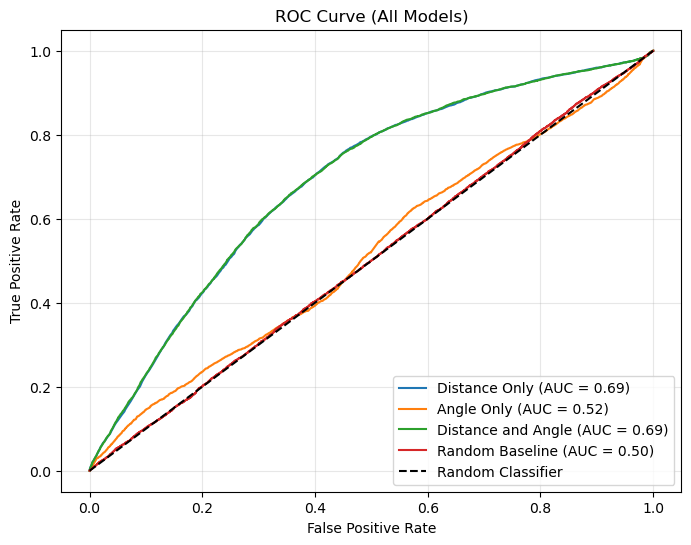

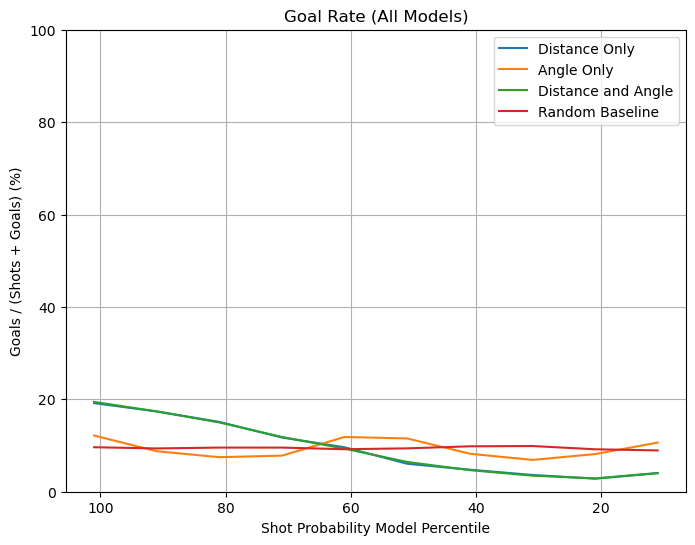

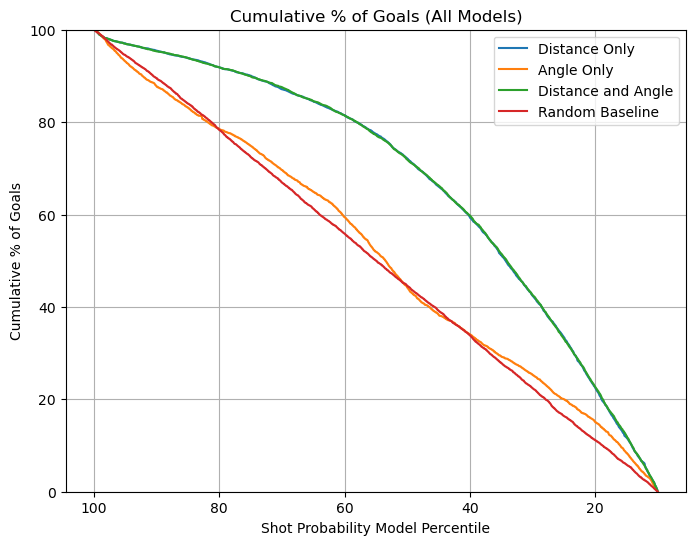

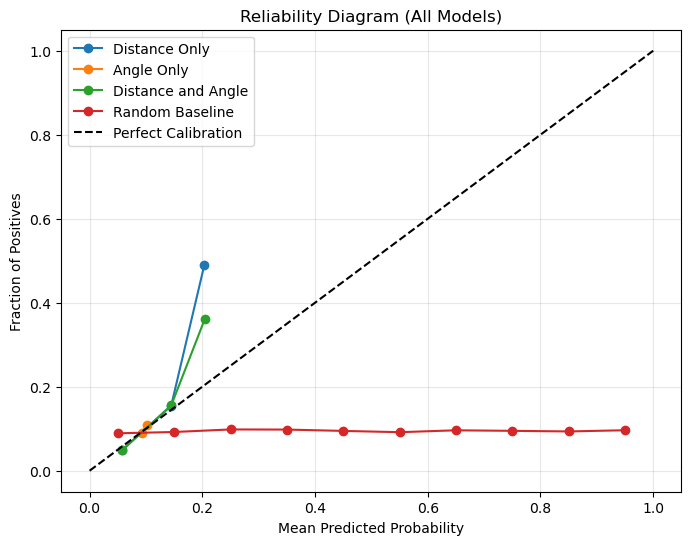

In [12]:
analyzer.evaluate_multiple_models()
